In [1]:
# ls

In [2]:
# path='test1.xlsx'

In [206]:
import pandas as pd

In [207]:
# kind_sheet=pd.read_excel(path,'K（物料）')
# kind_sheet.columns=['A','B','C','D','E','F','G','H','I','J','K']

In [208]:
# kind_sheet.head(10)

In [209]:
# kind_sheet=pd.read_csv('龙钢运输量表_final.csv')

In [210]:
kind_sheet=pd.read_excel('龙钢运输量表_final-修改(1).xlsx')

In [211]:
#raw
kind_sheet.head()

,流转类型,运输方式,来源单元,到达单元,物质名称,物质品类,物质量,日运输量,重车起点,重车终点,空车起点,空车终点,运输车辆的最大装载量,车次,日运输量新,车辆折算系数
0,仓配,公路,石灰厂,新炼钢,轻烧白云石,主产品,4.75,0.013571,15,32,32,15,15,97,1.399116,1.296610
1,仓配,公路,石灰厂,老炼钢,轻烧白云石,主产品,3.24,0.009257,15,43,43,15,44,95,0.974436,3.803390
2,仓配,公路,原料场,新炼钢,铁矿石,熔剂,3.33,0.009514,3,32,32,3,39,94,1.012158,3.371186
3,铁前,公路,原料场,炼铁1-4,萤石,熔剂,18.39,0.052543,3,9,9,3,10,92,5.711180,0.864407
4,仓配,公路,原料场,老炼钢,压块OG泥,冶金辅料,1.13,0.003229,3,43,43,3,38,92,0.350932,3.284746


In [212]:
kind_sheet['日运输量']=kind_sheet['物质量']/350*10000

In [213]:
#车辆折算系数 所有大于14t的车都是3.0; 小于14t的  按照2.0计算
def p(row):
    if row['运输车辆的最大装载量']>=14:
        return 3
    else:
        return 2
        


kind_sheet['车辆折算系数']=kind_sheet.apply(lambda row:p(row),axis=1)

In [214]:
# kind_sheet['运输车辆的最大装载量'].value_counts()

In [215]:
import math

In [216]:
kind_sheet.shape

(59, 16)

In [217]:
kind_sheet['车次']=kind_sheet['日运输量']*1.1/kind_sheet['运输车辆的最大装载量']
kind_sheet['车次']=kind_sheet['车次'].apply(lambda x:math.ceil(x))

In [218]:
kind_sheet['车次'].sum()

1055

In [219]:
# kind_sheet['车次'].sum()

In [220]:
kind_sheet.drop(columns=['日运输量新'],axis=1,inplace=True)

In [221]:
kind_sheet=kind_sheet.sort_values(by='物质量',ascending=False)

In [222]:
kind_sheet.head(20)

,流转类型,运输方式,来源单元,到达单元,物质名称,物质品类,物质量,日运输量,重车起点,重车终点,空车起点,空车终点,运输车辆的最大装载量,车次,车辆折算系数
44,铁前,公路,炼焦厂_1,炼铁5,焦炭,主产品,121.42,3469.142857,31,48,48,31,22,174,3
51,钢扎,公路,新炼钢,窄带,钢坯,粗钢,65.47,1870.571429,32,58,58,32,27,77,3
12,钢扎,公路,老炼钢,三棒,钢坯,粗钢,58.80,1680.000000,43,45,45,43,13,143,2
13,回收,公路,废钢堆场,新炼钢,废钢,自产物质,43.20,1234.285714,46,32,32,46,17,80,3
39,铁前,公路,石灰厂,450烧结,生石灰,主产品,31.85,910.000000,15,8,8,15,11,92,2
50,回收,公路,废钢堆场,老炼钢,废钢,自产物质,29.44,841.142857,46,43,43,46,45,21,3
52,铁前,公路,原料场,450烧结,白云石,熔剂,29.30,837.142857,3,8,8,3,28,33,3
9,回收,公路,炼铁1-4,原料场,高炉除尘灰,其他副产品,22.48,642.285714,9,3,3,9,48,15,3
8,回收,公路,炼铁5,原料场,高炉除尘灰,其他副产品,19.52,557.714286,48,3,3,48,26,24,3
31,回收,公路,炼铁1-4,原料场,返焦,其他副产品,19.06,544.571429,9,3,3,9,16,38,3


In [223]:
kind_sheet.tail(20)

,流转类型,运输方式,来源单元,到达单元,物质名称,物质品类,物质量,日运输量,重车起点,重车终点,空车起点,空车终点,运输车辆的最大装载量,车次,车辆折算系数
24,仓配,公路,原料场,新炼钢,压块OG泥,冶金辅料,1.66,47.428571,3,32,32,3,43,2,3
35,回收,公路,新炼钢,废钢堆场,连铸切头切尾,废钢类,1.53,43.714286,32,46,46,32,19,3,3
38,仓配,公路,原料场,新炼钢,萤石,熔剂,1.32,37.714286,3,32,32,3,21,2,3
4,仓配,公路,原料场,老炼钢,压块OG泥,冶金辅料,1.13,32.285714,3,43,43,3,38,1,3
26,回收,公路,老炼钢,废钢堆场,连铸切头切尾,废钢类,1.04,29.714286,43,46,46,43,14,3,3
18,仓配,公路,原料场,老炼钢,萤石,熔剂,0.90,25.714286,3,43,43,3,44,1,3
11,仓配,公路,原料场,新炼钢,合成渣,冶金辅料,0.85,24.285714,3,32,32,3,20,2,3
43,仓配,公路,原料场,新炼钢,钢包改质剂,冶金辅料,0.85,24.285714,3,32,32,3,38,1,3
30,回收,公路,新炼钢,废钢堆场,废连铸坯及试样,废钢类,0.85,24.285714,32,46,46,32,25,2,3
29,仓配,公路,原料场,老炼钢,合成渣,冶金辅料,0.58,16.571429,3,43,43,3,17,2,3


In [224]:
# kind=kind_sheet['A'][1:]
o1=kind_sheet['重车起点']
d1=kind_sheet['重车终点']
o2=kind_sheet['空车起点']
d2=kind_sheet['空车终点']
# c1=kind_sheet['H'][1:]
# c2=kind_sheet['I'][1:]
E=kind_sheet['车辆折算系数']
# Q=kind_sheet['日运输量新']

Q=kind_sheet['日运输量']
cap=kind_sheet['运输车辆的最大装载量']

In [225]:
# kind=kind_sheet['A'][1:]
# o1=kind_sheet['C'][1:]
# d1=kind_sheet['D'][1:]
# o2=kind_sheet['J'][1:]
# d2=kind_sheet['K'][1:]
# c1=kind_sheet['H'][1:]
# c2=kind_sheet['I'][1:]
# E=kind_sheet['G'][1:]
# Q=kind_sheet['E'][1:]
# cap=kind_sheet['F'][1:]

In [226]:
Q.head()

44    3469.142857
51    1870.571429
12    1680.000000
13    1234.285714
39     910.000000
Name: 日运输量, dtype: float64

In [227]:
#暂时设定为10车次
# kind_sheet['车次']=3

In [228]:
Amounts1=kind_sheet['车次']
Amounts2=kind_sheet['车次']

In [229]:
Amounts1.head()

44    174
51     77
12    143
13     80
39     92
Name: 车次, dtype: int64

In [230]:
# type(o1)

In [231]:
# kind


In [232]:
ls

 Volume in drive E is 学校资料资源教学
 Volume Serial Number is 5ADC-AF84

 Directory of E:\tsl_file\python_project\gene

2020/04/17  16:43    <DIR>          .
2020/04/17  16:43    <DIR>          ..
2020/04/17  16:41    <DIR>          .idea
2020/04/17  16:37    <DIR>          .ipynb_checkpoints
2020/03/18  10:58           712,932 1.总览.pdf
2020/03/18  11:24           281,284 2.数据结构.pdf
2020/03/18  16:18           915,928 3.快速入门.pdf
2020/03/18  13:32         1,025,649 4.进化算法模板.pdf
2020/03/24  17:03           479,811 5.多染色体混合编码.pdf
2020/03/24  17:08           231,949 6.多种群进化优化.pdf
2020/03/26  11:27            28,592 all_2018.xlsx
2020/04/01  20:39            14,233 distance.csv
2020/04/07  10:44            14,121 FD.csv
2020/04/07  10:44            14,121 FF.csv
2020/04/08  15:28            14,259 FHV.csv
2020/04/07  10:44            20,669 FW.csv
2020/04/15  13:39    <DIR>          geatpy_example
2020/03/17  12:32             7,959 gene.py
2020/03/25  14:24             1,271 graph
2020/04/17  16

In [233]:
l=pd.read_csv('distance.csv',header=None) #读取各个路段长度
# a=pd.read_csv('A（可达矩阵）') #读取各路段间的可达矩阵（此处应当按照物料品类进行分类，案列假设7种物料可达矩阵一致）
MSF=pd.read_csv('MSF.csv',header=None)#,'B2:K11');#读取路段的最大服务交通量
FHV=pd.read_csv('FHV.csv',header=None)#,'B2:K11');#读取交通组成修正系数
FD=pd.read_csv('FD.csv',header=None)#,'B2:K11');  #读取方向分布修正系数
FW=pd.read_csv('FW.csv',header=None)#,'B2:K11');  #读取车道宽度、路肩宽度修正系数
FF=pd.read_csv('FF.csv',header=None)#,'B2:K11');  #读取路测干扰修正系数


In [234]:
#道路路段：单项双车道,双向四车道
#将节点列表转为各个路段（双向）
single_double_lane={'road1':[25,26,27],'road2':[17,28,29,30,31,59,32,33,34,35,36]}
def get_all_double_lane(single_double_lane):
    double_lanes=set()
    for road ,path in single_double_lane.items():
        for path_pair in zip(path,path[1:]):
            double_lanes.add(path_pair)
            double_lanes.add((path_pair[1],path_pair[0]))
            print(path_pair)
    return double_lanes
        
    
double_lanes=get_all_double_lane(single_double_lane)    
double_lanes

(25, 26)
(26, 27)
(17, 28)
(28, 29)
(29, 30)
(30, 31)
(31, 59)
(59, 32)
(32, 33)
(33, 34)
(34, 35)
(35, 36)


{(17, 28),
 (25, 26),
 (26, 25),
 (26, 27),
 (27, 26),
 (28, 17),
 (28, 29),
 (29, 28),
 (29, 30),
 (30, 29),
 (30, 31),
 (31, 30),
 (31, 59),
 (32, 33),
 (32, 59),
 (33, 32),
 (33, 34),
 (34, 33),
 (34, 35),
 (35, 34),
 (35, 36),
 (36, 35),
 (59, 31),
 (59, 32)}

In [235]:
# ##禁止重车或空车通行的路段，默认为所有车次
# forbidden_paths={'material_type_index':0,'car_times':None,'forbidden_roads':[14,27]}



In [236]:
# forbidden_paths.get('material_type_index0',False)

In [237]:
FW[FW==1]=0.84

In [238]:
# 道路宽度6m,0.52;7.5 ,0.56;9m,0.84;
# 10.5m 修正系数取值1   宽度12.5m 取值1.16   14.5m取值1.32  大于16.5 取值1.48   双车道情况下 ；
w={6:0.53,7.5:0.86,9:0.84,10.5:1,12.5:1.16,14.5:1.32,16.5:1.48}

path_w={(5,6):12,(6,5):12,(24,14):14.5,(14,15):14.5,(15,16):14.5,(14, 24): 14.5, (15, 14): 14.5, (16, 15): 14.5 }

def process_w(ew):
    if (ew>=6) & (ew<7.5):
        return  0.53
    elif (ew>=7.5) &( ew <9) :
        return 0.86
    elif (ew>=9) & (ew < 10.5):
        return 0.84
    elif (ew>=10.5) &( ew <12.5) :
        return 1
    elif (ew>=12.5) & (ew <14.5) :
        return 1.16
    elif (ew>=14.5) & (ew < 16.5):
        return 1.32
    elif (ew>= 16.5):
        return 1.48
    else:
        return 0.84
    


In [239]:
for ep,ew in path_w.items():
    ep_index=(ep[0]-1,ep[1]-1)
    FW.iloc[ep_index]=process_w(ew)
    

In [240]:
FW.iloc[(14,15)]

1.32

In [241]:
FW.head(10)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.00009,0.84000,0.84000,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
1,0.84000,0.00009,0.00009,0.00009,0.84000,0.00009,0.00009,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
2,0.84000,0.00009,0.00009,0.84000,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
3,0.00009,0.00009,0.84000,0.00009,0.84000,0.00009,0.00009,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
4,0.00009,0.84000,0.00009,0.84000,0.00009,1.00000,0.00009,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
5,0.00009,0.00009,0.00009,0.00009,1.00000,0.00009,0.84000,0.84000,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
6,0.00009,0.00009,0.00009,0.00009,0.00009,0.84000,0.00009,0.00009,0.00009,0.84000,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
7,0.00009,0.00009,0.00009,0.00009,0.00009,0.84000,0.00009,0.00009,0.84000,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
8,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.84000,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
9,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.84000,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009


In [242]:
# t={(24,14):14.5,(14,15):14.5,(15,16):14.5}
# t2={(k[1],k[0]):v for k,v in t.items()}
# t2

In [243]:
FW.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.00009,0.84000,0.84000,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
1,0.84000,0.00009,0.00009,0.00009,0.84000,0.00009,0.00009,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
2,0.84000,0.00009,0.00009,0.84000,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
3,0.00009,0.00009,0.84000,0.00009,0.84000,0.00009,0.00009,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009
4,0.00009,0.84000,0.00009,0.84000,0.00009,1.00000,0.00009,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009,0.00009


In [244]:
l.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.0,394.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,394.0,0.0,0.0,0.0,251.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,150.0,0.0,0.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,113.0,0.0,358.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,251.0,0.0,358.0,0.0,357.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
MSF.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.0,420.0,420.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,420.0,1.0,1.0,1.0,420.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,420.0,1.0,1.0,420.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,420.0,1.0,420.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,420.0,1.0,420.0,1.0,420.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [246]:
FHV.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.000,0.333,0.333,1.000,1.000,1.000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.333,1.000,1.000,1.000,0.333,1.000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.333,1.000,1.000,0.333,1.000,1.000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.000,1.000,0.333,1.000,0.333,1.000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.000,0.333,1.000,0.333,1.000,0.333,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [247]:
ot=pd.DataFrame(o1.values.tolist())
dt=pd.DataFrame(d1.values.tolist())

In [248]:
ot.head()

,0
0,31
1,32
2,43
3,46
4,15


In [249]:
dt.head()

,0
0,48
1,58
2,45
3,32
4,8


In [250]:
type(dt)

pandas.core.frame.DataFrame

In [251]:
type(dt.iloc[:,0])

pandas.core.series.Series

In [252]:
FF.head(20)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.00,0.95,0.95,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.95,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.95,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.00,1.00,0.95,1.00,0.95,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.00,0.95,1.00,0.95,1.00,0.95,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.00,1.00,1.00,1.00,0.95,1.00,0.95,0.95,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,0.95,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00,0.95,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.00,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [253]:
# l=pd.read_excel(path,'L（路段长）').iloc[:,1:]#,'B2:K11');  #读取各个路段长度
# a=pd.read_excel(path,'A（可达矩阵）').iloc[:,1:]#,'B2:K11');  #读取各路段间的可达矩阵（此处应当按照物料品类进行分类，案列假设7种物料可达矩阵一致）
# MSF=pd.read_excel(path,'MSF（最大服务交通量）').iloc[:,1:]#,'B2:K11');#读取路段的最大服务交通量
# FHV=pd.read_excel(path,'FHV（交通组成修正系数）').iloc[:,1:]#,'B2:K11');#读取交通组成修正系数
# FD=pd.read_excel(path,'FD（方向分布系数）').iloc[:,1:]#,'B2:K11');  #读取方向分布修正系数
# FW=pd.read_excel(path,'FW（宽度修正系数）').iloc[:,1:]#,'B2:K11');  #读取车道宽度、路肩宽度修正系数
# FF=pd.read_excel(path,'FF（路测干扰系数）').iloc[:,1:]#,'B2:K11');  #读取路测干扰修正系数

# o1=pd.read_excel(path,'K（物料）','C3:C9');  #读取重车起点
# d1=pd.read_excel(path,'K（物料）','D3:D9');  #读取重车终点
# o2=pd.read_excel(path,'K（物料）','J3:J9');  #读取空车起点
# d2=pd.read_excel(path,'K（物料）','K3:K9');  #读取空车终点
# c1=pd.read_excel(path,'K（物料）','H3:H9');  #读取重车成本
# c2=pd.read_excel(path,'K（物料）','I3:I9');  #读取空车成本
# E=pd.read_excel(path,'K（物料）','G3:G9');     #读取运输物料k的车辆的折算系数
# Q=pd.read_excel(path,'K（物料）','E3:E9');     #读取物料k运输量的集合
# cap=pd.read_excel(path,'K（物料）','F3:F9');   #读取运载物料k的车辆的最大装载量
# alpha=0.8; 


In [254]:
# c2.head(10)

In [255]:
l.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.0,394.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,394.0,0.0,0.0,0.0,251.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,150.0,0.0,0.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,113.0,0.0,358.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,251.0,0.0,358.0,0.0,357.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [256]:
n=l.shape[0]
m=kind_sheet.shape[0]

In [257]:
n

59

In [258]:
m

59

In [259]:
E.head(20)

44    3
51    3
12    2
13    3
39    2
50    3
52    3
9     3
8     3
31    3
3     2
5     3
48    3
40    3
28    3
32    3
49    3
16    3
25    3
41    3
Name: 车辆折算系数, dtype: int64

In [260]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np

In [261]:
##用最新程序运行

生成一个空的有向图
为这个网络添加节点...


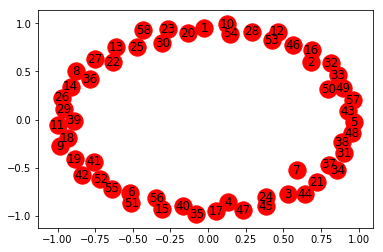

在网络中添加带权中的边...


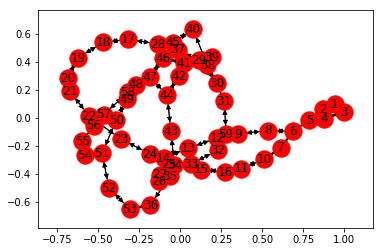

给网路设置布局...
画出网络图像：


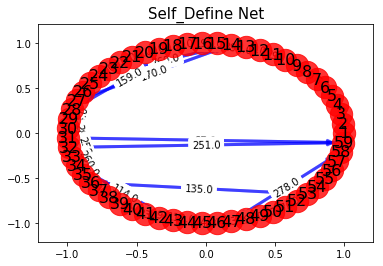

In [262]:
import math
# all_paths={}
# all_delete_edges=set()


print('生成一个空的有向图')
G=nx.DiGraph()
print('为这个网络添加节点...')
for i in range(1,l.shape[0]):
    G.add_node(i)

nx.draw_networkx(G)
plt.show()
    
print('在网络中添加带权中的边...')
for r in range(l.shape[0]):
    for c in range(l.shape[1]):
        if l.iloc[r,c]>0:
            G.add_weighted_edges_from([(r+1,c+1,l.iloc[r,c])])

            
nx.draw_networkx(G)
plt.show()
        


print('给网路设置布局...')
pos=nx.shell_layout(G)


#把节点画出来  
nx.draw_networkx_nodes(G,pos,node_color='r',node_size=500,alpha=0.8) #显示每一个结点 
  
#把边画出来  
nx.draw_networkx_edges(G,pos,width=3.0,alpha=0.5,edge_color='b')  #显示每一条边
  
#把节点的标签画出来  
nx.draw_networkx_labels(G,pos,font_size=16)     #显示每一个结点上的数字


print('画出网络图像：')
# nx.draw(G,pos,with_labels=True, node_color='white', edge_color='red', node_size=400, alpha=0.5 )


#把边权重画出来  
edge_labels = nx.get_edge_attributes(G,'weight')    #获取每一条边的权重
nx.draw_networkx_edge_labels(G, pos, edge_labels)   #为图添加上权重

plt.title('Self_Define Net',fontsize=15)
plt.show()



In [263]:
alpha=0.8
#用下面的代替车辆行驶100次
# alpha=0.08

In [264]:
##起点，必经点集合（默认走第一个点，饱和之后顺次走下一个点），终点；index是物料类型

##物料0，必经点24，汽车衡720重卡每天（空车需要转为重车进行计算么？还是只计算重车，如果空车经过该汽车衡）


###禁止点集合：某类物料禁止经过该

In [265]:
# 物料号，车次，禁止的路段;默认所有车次（）
forbidden_paths={ 0:[  None,  (14, 27)]}
# {'material_type_index': 0, 'car_times': None, 'forbidden_roads': [14, 27]}
material_info=forbidden_paths.get(0,False)
material_info[1]



##单向通行和禁止重车通行（有物料种类无关）
#单向通行，一开始就告诉哪些路段是单项通行的：告诉单向路径如1-2-3-4-5；初始化网络时完成
#禁止重车通行（双向），后面需要判断是否为重车，是重车就断开，重车行驶完毕再连接上；动态变化




(14, 27)

In [266]:
a=[1,2,3,4]
a.reverse()
a

[4, 3, 2, 1]

In [267]:
#必经点汽车衡约束
# 物料号，车次，必须经过的节点
##真实情况可能是多种物料经过多个汽车衡（多对多的关系，例如原料（物质1，物质2，物质3），可以经过汽车衡1、汽车衡2、汽车衡3（依次）），
# 如果某个汽车衡超标，就要自动选择一个可用的汽车衡还是怎么做（目前自动提示，已达到数量，然后提建议）？？？？
##采样点情况也一样

must_pass_nodes={0:[None,35,'truck_scale_nodes'],1:[None,35,'truck_scale_nodes']}#物料对应必经点信息
# must_passed_nodes_info={35:'truck_scale_nodes_index',24:'sample_nodes_index'}#

In [268]:
# G.add_edge(*(14, 27))

In [269]:
def get_shortest_path(index,car_times,start_end_tuple,car_type):   
    

    
#     for index,( s ,e) in enumerate(start_end_tuple_list):
#     print('start_end_tuple',type(start_end_tuple))
    if (start_end_tuple not in all_paths) or ( set(all_paths.get(start_end_tuple,(None,None)))&all_delete_edges):
        s,e=start_end_tuple

        all_shortest_path=list(nx.all_shortest_paths(G,s,e,'weight'))
        #最短路径有多条时，选择节点数最少的那个最短路径
        if len( all_shortest_path)>1:
            len_min_index=np.argmin([len(each)for each in all_shortest_path])
            all_shortest_path_use=all_shortest_path[len_min_index]
        else:
            all_shortest_path_use=all_shortest_path[0]
        all_heavy_path['{}{}'.format(car_type,index+1)]=all_shortest_path_use

#         print('路径号{},车次{}，{}{} 源节点{}，终点为{},最短路径为：{}'.format(index,car_times,car_type,index+1,s,e,all_shortest_path_use))
        distance=nx.shortest_path_length(G,s,e,'weight')


#         print('路径号{},车次{},{}{}源节点为{}，终点为{},最短距离：{}'.format(index,car_times,car_type,index+1,s,e, distance))
        pairs_list=list(zip(all_shortest_path_use,all_shortest_path_use[1:]))
#         print('pairs_list={}\n'.format(pairs_list))
    
        all_paths[start_end_tuple]=pairs_list
        all_distance[start_end_tuple]=distance
#         all_paths[start_end_tuple].append(pairs_list)
    else:
        pairs_list=all_paths[start_end_tuple]
        distance=all_distance[start_end_tuple]
#         print('已经存在的最短路径为：路径号{},车次{},{},{}'.format(index,car_times,start_end_tuple,pairs_list))

#     G.add_edge(*material_info[1])
    return  index,car_times,start_end_tuple,car_type,pairs_list,distance

In [270]:
def judge_conditions(index,car_times,start_end_tuple,car_type,pairs_list,distance):   
    success=1#0是失败，1是成功
    res_temp_list=[]
    '''
    1.全部满足时，全部更新路段限制条件，并且返回最短路径和最短距离
    2.当某个路段不满足条件时，返回pair_index对应的路段，临时删除该路段，调用最短路径算法重新执行，然后在判断，直到全部满足条件或者无解时结束
    #重车时删除的路段先不恢复，等到空车时在将删除的路段恢复（相当于重新构建一次网络图，然后安装之前的策略进行），重新运行
    
    
    '''
    
    ##计算每个路段道路通行能力
    ##第一辆车拉着第一种货物一次经过第一个、二个、等各个节点
    e0=E.iloc[index]
    q0=Q.iloc[index]
    c0=cap.iloc[index]
    q_div_c=q0/c0
#     op=e0*math.ceil(q_div_c)
    op=e0
#     ##将重车转为标车
#     if op=='heavy':
# #         print('重车{},{},{}乘以1.5转为标车'.format(index,car_times,car_type))
#         op=op*1.5
# #     print('op',op)

    
#     print('约束最短路径为：',pairs_list)

    ##对于该路径中的所有路段，依次更新负荷值，全部路段满足要求时，该路径可以；
    #如果某个路段不满足要求，那么就要重新计算，并更新负荷值，直到满足要求为止。
    
    
    ###这个地方有问题，只有所有路段都满足通行要求时才能一次性更新，否则不能更新；只能重新计算最短路径然后在判断是否满足要求
    ###当然一个路段一个路段更新也是可以的，但是更新到最好必须是有解的，要是没有解的话得重新计算整条路径或者其它处理方法
    
    ##先假设都能有可行解，后面的待会考虑
    
    
    ##删除路段后也是重新计算最短路，所以还是一条路径满足所有条件时，然后才返回
#     print('预选路径号{},车次{}，{}{} 源节点{}，终点为{},最短路径为：{}'.format(index,car_times,car_type,index+1,start_end_tuple[0],start_end_tuple[1],pairs_list))
    for pair in pairs_list:
        ##已经使用的路段都是满足道路通行能力的   
        pair_index=tuple((int(each)-1 for each in pair))
        
        ##每个路段24小时实际通行能力（车辆数）
        real_amounts=(MSF.iloc[pair_index]*FHV.iloc[pair_index]*FD.iloc[pair_index]*FW.iloc[pair_index]*FF.iloc[pair_index]*24)
        if pair in double_lanes:
#              print('路段{}是单项双车道，乘以1.85'.format(pair))
             real_amounts= real_amounts*1.85
            
        
        
        res_temp= op/real_amounts
        
        
#         print('res_temp={},MSF={},FHV.iloc[pair_index]={},FD.iloc[pair_index]={},FW.iloc[pair_index]={},FF.iloc[pair_index]={}'.format(
#             MSF.iloc[pair_index]*FHV.iloc[pair_index]*FD.iloc[pair_index]*FW.iloc[pair_index]*FF.iloc[pair_index],
#             MSF.iloc[pair_index],
#             FHV.iloc[pair_index],
#             FD.iloc[pair_index],
#             FW.iloc[pair_index],
#             FF.iloc[pair_index]
            
            
            
#             ))
        
        res_temp_list.append(res_temp)
        
        ##可能第一个路段就大于alpha也可能是后面的路段才大于等于alpha
        
#         if res[pair_index]+res_temp<alpha:
        ##这里道路通行能力是双向的：即是整个道路而不是道路上某个方向的车道
        pair_index_invert=tuple((pair_index[1],pair_index[0]))
        if res[pair_index]+res[pair_index_invert]+res_temp<alpha:
            pass
# #             print('res_temp={},pair_res={},pair_index={}'.format(res_temp,res[pair_index],pair_index))
#             res[pair_index]+=res_temp
# #             print('当前最短路径为:pairs_list',pairs_list)
        
#             if pair not in all_pairs_index_new.keys():
#                 all_pairs_index_new[pair]={}
#                 if car_type not in all_pairs_index_new[pair].keys():
#                     all_pairs_index_new[pair][car_type]=[]
#                     all_pairs_index_new[pair][car_type].append(index+1)
#                 else:
#                     all_pairs_index_new[pair][car_type].append(index+1)
                    
                    
#             else:   
#                 if car_type not in all_pairs_index_new[pair].keys():
#                     all_pairs_index_new[pair][car_type]=[]
#                     all_pairs_index_new[pair][car_type].append(index+1)
#                 else:
#                     all_pairs_index_new[pair][car_type].append(index+1)
        else:
            #暂时删除该有项边，重新找最短路径，找到最短路径后在将有向边加上
            print('删除该路段 {}'.format(pair))#暂时注释掉
#             print('res_temp={},pair_res={},pair_index={}\n'.format(res_temp,res[pair_index],pair_index))
            
#             if 
            
            G.remove_edge(*pair)
            all_delete_edges.add(pair)
            success=0
            
            break  
            
#             get_limited_shortest_path(index,start_end_tuple,car_type)
#             get_limited_shortest_path(index,car_times,start_end_tuple,car_type)
            
#             print('添加该路段 {}\n'.format(pair))
#             G.add_edge(*pair)
#             all_delete_edges.remove(pair)
    if success:
            #成功返回最短路径；并整体更新限制条件
            for pair ,res_temp in zip(pairs_list,res_temp_list):
                    pair_index=tuple((int(each)-1 for each in pair))
                    #单元出入口等不计算负荷率
#                     join_set=set(pair)&set(no_rate_nodes)
#                     if join_set:
#                         print('join_set',join_set)
                    if not set(pair)&set(no_rate_nodes):
                        res[pair_index]+=res_temp


                    if pair not in all_pairs_index_new.keys():
                            all_pairs_index_new[pair]={}
                            if car_type not in all_pairs_index_new[pair].keys():
                                all_pairs_index_new[pair][car_type]=[]
                                all_pairs_index_new[pair][car_type].append(index+1)
                            else:
                                all_pairs_index_new[pair][car_type].append(index+1)


                    else:   
                        if car_type not in all_pairs_index_new[pair].keys():
                            all_pairs_index_new[pair][car_type]=[]
                            all_pairs_index_new[pair][car_type].append(index+1)
                        else:
                            all_pairs_index_new[pair][car_type].append(index+1)

                
            return success, pairs_list,distance
    else:      
        #失败返回，失败的那个路段
        return success,pair ,None       
    

In [271]:
def get_limited_shortest_path(index,car_times,start_end_tuple,car_type): 
    
    
    index,car_times,start_end_tuple,car_type,pairs_list,distance=get_shortest_path(index,car_times,start_end_tuple,car_type)
    success,path,distance =judge_conditions(index,car_times,start_end_tuple,car_type,pairs_list,distance)
    
    ##删除某个路段之后，需要重新寻找最短路，即调用最短路径算法
    while True:
          try:
           
               if success:
                    break
               else:
                    index,car_times,start_end_tuple,car_type,pairs_list,distance=get_shortest_path(index,car_times,start_end_tuple,car_type)
                    success,path ,distance=judge_conditions(index,car_times,start_end_tuple,car_type,pairs_list,distance)
          except Exception as e:
            print('error 往后车次无解',e,start_end_tuple,)
            break
    ##获取该条满足条件的最短路径之后，恢复被删除的路径
     
#             all_delete_edges.remove(pair)
     
    all_delete_edges_copy=all_delete_edges.copy()
    for pair in all_delete_edges_copy:
#         print('pairssss',pair)
        G.add_edge(*pair)
        all_delete_edges.remove(pair)
    
    #清空删除的保存路径
#     global all_delete_edges

#     all_delete_edges=set()
        
                    
                    
    return path,distance
    

In [272]:
o1.head()

44    31
51    32
12    43
13    46
39    15
Name: 重车起点, dtype: int64

In [273]:
d1.head()

44    48
51    58
12    45
13    32
39     8
Name: 重车终点, dtype: int64

In [274]:
all_car_se={}
all_car_se['heavy']=list(zip(o1,d1,Amounts1))
all_car_se['light']=list(zip(o2,d2,Amounts2))


In [275]:
#生成网络图
import math
print('生成一个空的有向图')
G=nx.DiGraph()
print('为这个网络添加节点...')
for i in range(1,l.shape[0]):
    G.add_node(i)

# nx.draw_networkx(G)
# plt.show()
    
print('在网络中添加带权中的边...')
for r in range(l.shape[0]):
    for c in range(l.shape[1]):
        if l.iloc[r,c]>0:
            G.add_weighted_edges_from([(r+1,c+1,l.iloc[r,c])])

生成一个空的有向图
为这个网络添加节点...
在网络中添加带权中的边...


In [276]:
import time

In [277]:
# pd.DataFrame([[1,2,3],[4,5,6
#                       ]])
a=[2,3,4,0]
print(a.reverse())
a

None


[0, 4, 3, 2]

In [278]:
must_pass_nodes

{0: [None, 35, 'truck_scale_nodes'], 1: [None, 35, 'truck_scale_nodes']}

In [279]:
# start_end_tuple_list

In [280]:
# all_car_se

##单元出入口 大门 汽车衡 采样点直接相连节点构成的路段等不计算道路负荷率
no_rate_nodes=[3,43,5,6,8,9]
# no_rate_nodes=[]



In [281]:
##道路通行可分为：双向、单向（告诉单向路径列表）、禁止（告诉禁止路径列表）
res=np.zeros((59,59))
all_heavy_path={}
all_pairs_index_new={}

all_datas=[]
all_paths={}
all_distance={}
all_delete_edges=set()
all_must_passed_nodes_operating_rate={}#节点序号：作业率
# pair (2, 3) {'heavy': [1, 2]} 0.03879548100926288 True
# start_end_tuple_list=zip(o1,d1)
start=time.time()
# 数据格式all_car_se={{'heavy': [(15, 32, 97),(15, 43, 95)],'light': [(32, 15, 97),(32, 3, 94)]}
no_heavy_flag=1
# no_heavy_nodes_path=[25,33,34]
no_heavy_nodes_path=[(25,33),(33,34),(34,33),(33,25)]

for car_type,start_end_tuple_list in all_car_se.items():
    #car_type车型：heavy or light
#     start_end_tuple_list={'heavy': [(15, 32, 97),(15, 43, 95)] 包含起始点以及车次
    ##禁止重车通行：第一辆重车时删除；遇到空车时添加
    if car_type=='heavy' and no_heavy_flag:
        #删除禁止道路
        
        G.remove_edges_from(no_heavy_nodes_path)
        no_heavy_flag=0
    elif  car_type=='light':
        #添加删除的路段
        G.add_edges_from(no_heavy_nodes_path)
        no_heavy_flag=1
        
    
    
    for index,( s ,e,amounts) in enumerate(start_end_tuple_list):
       
        
         #会计算最短路径，更新路段使用的容量
    #     print(*(s,e))
        start_end_tuple=(s,e)
        
        ##这里要修改禁止通行的路段是与物料种类无关
        material_info=forbidden_paths.get(index,False)
        if material_info:
            G.remove_edge(*material_info[1])
            
            
        #必经点包括汽车衡以及采样点：与特定的物料绑定
        nodes_info=must_pass_nodes.get(index,False)
      
    
        
        
        
        for car_times in range(amounts):
            ##index要进行修改
#             each_temp=[]
            ##只对重车进行称量
            if nodes_info and car_type=='heavy':
               
        
                pass_node=nodes_info[1]
                rate_type=nodes_info[2]
                
                if pass_node not in  all_must_passed_nodes_operating_rate:
                     car_times_all=0
                    
                
                
                if rate_type=='truck_scale_nodes':
                        t=1.5
                else:
                        t=4
                
                ##汽车衡：以必经点为键，对应某种物料的车次通过不断相加；这里有问题要修改???????????
                
                car_times_all=car_times_all+1
                    
                print('car_times_all',car_times_all)
                all_must_passed_nodes_operating_rate[pass_node]=['{}'.format(rate_type),(car_times_all)*t/1440]
                
                if all_must_passed_nodes_operating_rate[pass_node][1]<0.8:
                    
                   

                    

                    start_end_tuple_1=(start_end_tuple[0],pass_node)
                    start_end_tuple_2=(pass_node,start_end_tuple[1])

                    path_1,dd1=get_limited_shortest_path(index,car_times,start_end_tuple_1,car_type)
                    path_2,dd2=get_limited_shortest_path(index,car_times,start_end_tuple_2,car_type)
                    if isinstance(path_1,list) and isinstance(path_2,list):
                        print('物料种类号{},必经点{}，车次{}，{}{} 源节点{}，终点为{},最短距离为：{}，路径为：{},{}'.format(index,pass_node,car_times,car_type,index+1,s,e,dd1+dd2,path_1,path_2))
                        all_datas.append([index,car_times,'{}{}'.format(car_type,index+1),s,e,dd1+dd2])
                    else:
                        print('无解：物料种类号{},必经点{}，车次{}，{}{} 源节点{}，终点为{},最短距离为：{}，路径为：{},{}'.format(index,pass_node,car_times,car_type,index+1,s,e,None,path_1,path_2))
                        all_datas.append([index,car_times,'{}{}'.format(car_type,index+1),s,e,None])
                else:
                     print('经过必经点无解')
                
            else:
                
                
               
                
            
                    path,dd=get_limited_shortest_path(index,car_times,start_end_tuple,car_type)
                    if isinstance(path,list):
        #              print('pathsssss',path)
                        print('物料种类号{},车次{}，{}{} 源节点{}，终点为{},最短距离为：{}，路径为：{}'.format(index,car_times,car_type,index+1,s,e,dd,path))
                    else:
                        print('无解：物料种类号{},车次{}，{}{} 源节点{}，终点为{},最短距离为：{}，路径为：{}'.format(index,car_times,car_type,index+1,s,e,dd,path))

                    all_datas.append([index,car_times,'{}{}'.format(car_type,index+1),s,e,dd])
        #         if index >1:
        #             break
        #     break

            #     break
    
    
        if material_info:
            G.add_edge(*material_info[1])
    
    
print('cost time:{}s'.format(time.time()-start))
all_df=pd.DataFrame(all_datas,columns=['物料号','车次','车类型','起点','终点','距离'])
all_df.head()

##空车1

car_times_all 1
物料种类号0,必经点35，车次0，heavy1 源节点31，终点为48,最短距离为：3360.0，路径为：[(31, 30), (30, 38), (38, 39), (39, 41), (41, 42), (42, 44), (44, 43), (43, 34), (34, 35)],[(35, 36), (36, 53), (53, 52), (52, 51), (51, 50), (50, 49), (49, 48)]
car_times_all 2
物料种类号0,必经点35，车次1，heavy1 源节点31，终点为48,最短距离为：3360.0，路径为：[(31, 30), (30, 38), (38, 39), (39, 41), (41, 42), (42, 44), (44, 43), (43, 34), (34, 35)],[(35, 36), (36, 53), (53, 52), (52, 51), (51, 50), (50, 49), (49, 48)]
car_times_all 3
物料种类号0,必经点35，车次2，heavy1 源节点31，终点为48,最短距离为：3360.0，路径为：[(31, 30), (30, 38), (38, 39), (39, 41), (41, 42), (42, 44), (44, 43), (43, 34), (34, 35)],[(35, 36), (36, 53), (53, 52), (52, 51), (51, 50), (50, 49), (49, 48)]
car_times_all 4
物料种类号0,必经点35，车次3，heavy1 源节点31，终点为48,最短距离为：3360.0，路径为：[(31, 30), (30, 38), (38, 39), (39, 41), (41, 42), (42, 44), (44, 43), (43, 34), (34, 35)],[(35, 36), (36, 53), (53, 52), (52, 51), (51, 50), (50, 49), (49, 48)]
car_times_all 5
物料种类号0,必经点35，车次4，heavy1 源节点31，终点为48,最短距离为：3360.0，路径为：[(31, 3

物料种类号0,必经点35，车次158，heavy1 源节点31，终点为48,最短距离为：3360.0，路径为：[(31, 30), (30, 38), (38, 39), (39, 41), (41, 42), (42, 44), (44, 43), (43, 34), (34, 35)],[(35, 36), (36, 53), (53, 52), (52, 51), (51, 50), (50, 49), (49, 48)]
car_times_all 160
物料种类号0,必经点35，车次159，heavy1 源节点31，终点为48,最短距离为：3360.0，路径为：[(31, 30), (30, 38), (38, 39), (39, 41), (41, 42), (42, 44), (44, 43), (43, 34), (34, 35)],[(35, 36), (36, 53), (53, 52), (52, 51), (51, 50), (50, 49), (49, 48)]
car_times_all 161
物料种类号0,必经点35，车次160，heavy1 源节点31，终点为48,最短距离为：3360.0，路径为：[(31, 30), (30, 38), (38, 39), (39, 41), (41, 42), (42, 44), (44, 43), (43, 34), (34, 35)],[(35, 36), (36, 53), (53, 52), (52, 51), (51, 50), (50, 49), (49, 48)]
car_times_all 162
物料种类号0,必经点35，车次161，heavy1 源节点31，终点为48,最短距离为：3360.0，路径为：[(31, 30), (30, 38), (38, 39), (39, 41), (41, 42), (42, 44), (44, 43), (43, 34), (34, 35)],[(35, 36), (36, 53), (53, 52), (52, 51), (51, 50), (50, 49), (49, 48)]
car_times_all 163
物料种类号0,必经点35，车次162，heavy1 源节点31，终点为48,最短距离为：3360.0，路径为：[(31,

物料种类号2,车次121，heavy3 源节点43，终点为45,最短距离为：990.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46), (46, 45)]
物料种类号2,车次122，heavy3 源节点43，终点为45,最短距离为：990.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46), (46, 45)]
物料种类号2,车次123，heavy3 源节点43，终点为45,最短距离为：990.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46), (46, 45)]
物料种类号2,车次124，heavy3 源节点43，终点为45,最短距离为：990.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46), (46, 45)]
物料种类号2,车次125，heavy3 源节点43，终点为45,最短距离为：990.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46), (46, 45)]
物料种类号2,车次126，heavy3 源节点43，终点为45,最短距离为：990.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46), (46, 45)]
物料种类号2,车次127，heavy3 源节点43，终点为45,最短距离为：990.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46), (46, 45)]
物料种类号2,车次128，heavy3 源节点43，终点为45,最短距离为：990.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46), (46, 45)]
物料种类号2,车次129，heavy3 源节点43，终点为45,最短距离为：990.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46), (46, 45)]
物料种类号2,车次130，heavy3 源节点43，终点为45,最短距离为：990.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46), (46, 45)]
物料种类号2,车次1

物料种类号11,车次20，heavy12 源节点3，终点为9,最短距离为：1083.0，路径为：[(3, 4), (4, 5), (5, 6), (6, 8), (8, 9)]
物料种类号11,车次21，heavy12 源节点3，终点为9,最短距离为：1083.0，路径为：[(3, 4), (4, 5), (5, 6), (6, 8), (8, 9)]
物料种类号11,车次22，heavy12 源节点3，终点为9,最短距离为：1083.0，路径为：[(3, 4), (4, 5), (5, 6), (6, 8), (8, 9)]
物料种类号11,车次23，heavy12 源节点3，终点为9,最短距离为：1083.0，路径为：[(3, 4), (4, 5), (5, 6), (6, 8), (8, 9)]
物料种类号12,车次0，heavy13 源节点3，终点为9,最短距离为：1083.0，路径为：[(3, 4), (4, 5), (5, 6), (6, 8), (8, 9)]
物料种类号12,车次1，heavy13 源节点3，终点为9,最短距离为：1083.0，路径为：[(3, 4), (4, 5), (5, 6), (6, 8), (8, 9)]
物料种类号12,车次2，heavy13 源节点3，终点为9,最短距离为：1083.0，路径为：[(3, 4), (4, 5), (5, 6), (6, 8), (8, 9)]
物料种类号12,车次3，heavy13 源节点3，终点为9,最短距离为：1083.0，路径为：[(3, 4), (4, 5), (5, 6), (6, 8), (8, 9)]
物料种类号12,车次4，heavy13 源节点3，终点为9,最短距离为：1083.0，路径为：[(3, 4), (4, 5), (5, 6), (6, 8), (8, 9)]
物料种类号12,车次5，heavy13 源节点3，终点为9,最短距离为：1083.0，路径为：[(3, 4), (4, 5), (5, 6), (6, 8), (8, 9)]
物料种类号12,车次6，heavy13 源节点3，终点为9,最短距离为：1083.0，路径为：[(3, 4), (4, 5), (5, 6), (6, 8), (8, 9)]
物料种类号12,车次7，heavy13 源节点3，终点为

物料种类号29,车次2，heavy30 源节点32，终点为3,最短距离为：4553.0，路径为：[(32, 59), (59, 31), (31, 30), (30, 29), (29, 28), (28, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 14), (14, 13), (13, 12), (12, 9), (9, 8), (8, 6), (6, 5), (5, 4), (4, 3)]
物料种类号29,车次3，heavy30 源节点32，终点为3,最短距离为：4553.0，路径为：[(32, 59), (59, 31), (31, 30), (30, 29), (29, 28), (28, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 14), (14, 13), (13, 12), (12, 9), (9, 8), (8, 6), (6, 5), (5, 4), (4, 3)]
物料种类号29,车次4，heavy30 源节点32，终点为3,最短距离为：4553.0，路径为：[(32, 59), (59, 31), (31, 30), (30, 29), (29, 28), (28, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 14), (14, 13), (13, 12), (12, 9), (9, 8), (8, 6), (6, 5), (5, 4), (4, 3)]
物料种类号29,车次5，heavy30 源节点32，终点为3,最短距离为：4553.0，路径为：[(32, 59), (59, 31), (31, 30), (30, 29), (29, 28), (28, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 14), (14, 13), (13, 12), (12, 9), (9, 8), 

物料种类号1,车次36，light2 源节点58，终点为32,最短距离为：763.0，路径为：[(58, 47), (47, 44), (44, 43), (43, 34), (34, 33), (33, 32)]
物料种类号1,车次37，light2 源节点58，终点为32,最短距离为：763.0，路径为：[(58, 47), (47, 44), (44, 43), (43, 34), (34, 33), (33, 32)]
物料种类号1,车次38，light2 源节点58，终点为32,最短距离为：763.0，路径为：[(58, 47), (47, 44), (44, 43), (43, 34), (34, 33), (33, 32)]
物料种类号1,车次39，light2 源节点58，终点为32,最短距离为：763.0，路径为：[(58, 47), (47, 44), (44, 43), (43, 34), (34, 33), (33, 32)]
物料种类号1,车次40，light2 源节点58，终点为32,最短距离为：763.0，路径为：[(58, 47), (47, 44), (44, 43), (43, 34), (34, 33), (33, 32)]
物料种类号1,车次41，light2 源节点58，终点为32,最短距离为：763.0，路径为：[(58, 47), (47, 44), (44, 43), (43, 34), (34, 33), (33, 32)]
物料种类号1,车次42，light2 源节点58，终点为32,最短距离为：763.0，路径为：[(58, 47), (47, 44), (44, 43), (43, 34), (34, 33), (33, 32)]
物料种类号1,车次43，light2 源节点58，终点为32,最短距离为：763.0，路径为：[(58, 47), (47, 44), (44, 43), (43, 34), (34, 33), (33, 32)]
物料种类号1,车次44，light2 源节点58，终点为32,最短距离为：763.0，路径为：[(58, 47), (47, 44), (44, 43), (43, 34), (34, 33), (33, 32)]
物料种类号1,车次45，light2 源节点58，终点为

物料种类号5,车次12，light6 源节点43，终点为46,最短距离为：603.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46)]
物料种类号5,车次13，light6 源节点43，终点为46,最短距离为：603.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46)]
物料种类号5,车次14，light6 源节点43，终点为46,最短距离为：603.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46)]
物料种类号5,车次15，light6 源节点43，终点为46,最短距离为：603.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46)]
物料种类号5,车次16，light6 源节点43，终点为46,最短距离为：603.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46)]
物料种类号5,车次17，light6 源节点43，终点为46,最短距离为：603.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46)]
物料种类号5,车次18，light6 源节点43，终点为46,最短距离为：603.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46)]
物料种类号5,车次19，light6 源节点43，终点为46,最短距离为：603.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46)]
物料种类号5,车次20，light6 源节点43，终点为46,最短距离为：603.0，路径为：[(43, 44), (44, 42), (42, 41), (41, 46)]
物料种类号6,车次0，light7 源节点8，终点为3,最短距离为：973.0，路径为：[(8, 6), (6, 5), (5, 4), (4, 3)]
物料种类号6,车次1，light7 源节点8，终点为3,最短距离为：973.0，路径为：[(8, 6), (6, 5), (5, 4), (4, 3)]
物料种类号6,车次2，light7 源节点8，终点为3,最短距离为：973.0，路径为：[(8, 6), (

物料种类号16,车次9，light17 源节点48，终点为3,最短距离为：3028.0，路径为：[(48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 36), (36, 35), (35, 27), (27, 14), (14, 13), (13, 12), (12, 9), (9, 8), (8, 6), (6, 5), (5, 4), (4, 3)]
物料种类号16,车次10，light17 源节点48，终点为3,最短距离为：3028.0，路径为：[(48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 36), (36, 35), (35, 27), (27, 14), (14, 13), (13, 12), (12, 9), (9, 8), (8, 6), (6, 5), (5, 4), (4, 3)]
物料种类号16,车次11，light17 源节点48，终点为3,最短距离为：3028.0，路径为：[(48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 36), (36, 35), (35, 27), (27, 14), (14, 13), (13, 12), (12, 9), (9, 8), (8, 6), (6, 5), (5, 4), (4, 3)]
物料种类号16,车次12，light17 源节点48，终点为3,最短距离为：3028.0，路径为：[(48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 36), (36, 35), (35, 27), (27, 14), (14, 13), (13, 12), (12, 9), (9, 8), (8, 6), (6, 5), (5, 4), (4, 3)]
物料种类号17,车次0，light18 源节点48，终点为3,最短距离为：3028.0，路径为：[(48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 36), (36, 35), (35, 27), (27, 14), (14, 13), (13, 12), (12, 9

,物料号,车次,车类型,起点,终点,距离
0,0,0,heavy1,31,48,3360.0
1,0,1,heavy1,31,48,3360.0
2,0,2,heavy1,31,48,3360.0
3,0,3,heavy1,31,48,3360.0
4,0,4,heavy1,31,48,3360.0


In [282]:
car_times_all

251

In [283]:
all_must_passed_nodes_operating_rate

{35: ['truck_scale_nodes', 0.26145833333333335]}

In [284]:
# all_must_passed_nodes_operating_rate

In [285]:
# all_df.to_excel('res.xlsx',index=False)

In [286]:
FW.iloc[5,4]

1.0

In [287]:
FW.iloc[4,5]

1.0

In [288]:
res[res>0].max()

0.43221552751390724

In [197]:
#新
# res[res>0]

In [198]:
res.shape


(59, 59)

In [199]:
tt=res[0:10,0:10]

In [200]:
for e1 in range(10):
    for e2 in range(10):
        rr=tt[e1,e2]+tt[e2,e1]
        if rr>0.7:
            print(e1,e2,rr)
    

In [201]:
res[4,5]

0.0

In [202]:
res[0:20,0:20]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

In [91]:
all_pairs_index_new

{(31,
  30): {'heavy': [1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
 

In [92]:
all_roads_single_path={'r1':[1,2,3,4],'r2':[3,4,5,6]}
if all_roads_single_path:
        for road ,nodes_list in all_roads_single_path.items():
#             print(nodes_list)
            nodes_list.reverse()
            forbiddened_path=nodes_list
#             print(forbiddened_path)
            no_pairs=zip(forbiddened_path,forbiddened_path[1:])
#             for pair in no_pairs:
#                 print(pair)

In [93]:
list(no_pairs)

[(6, 5), (5, 4), (4, 3)]

生成一个空的有向图
为这个网络添加节点...


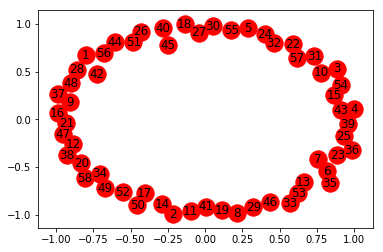

在网络中添加带权中的边...


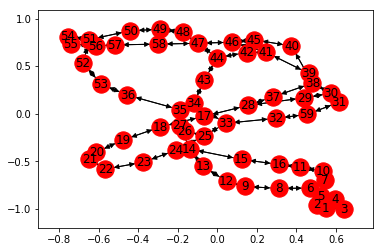

给网路设置布局...
画出网络图像：


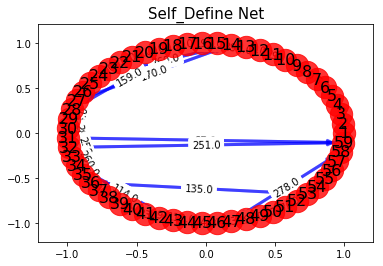

In [94]:

#自定义网络
# row=np.array([0,0,0,1,2,3,6])
# col=np.array([1,2,3,4,5,6,7])
# value=np.array([1,2,1,8,1,3,5])

# row=np.array([1,1,2,2,3,3,4,4,5,6,7,8,8,   2,9,3,9,4,10,5,6,6,7,8,9,10])
# col=np.array([2,9,3,9,4,10,5,6,6,7,8,9,10,1,1,2,2,3,3,4,4,5,6,7,8,8])
# value=np.array([4,4,1,4,4,1,3,8,1,2,2,1,3,4,4,1,4,4,1,3,8,1,2,2,1,3])



# for 


print('生成一个空的有向图')
G=nx.DiGraph()
print('为这个网络添加节点...')
for i in range(1,l.shape[0]):
    G.add_node(i)

nx.draw_networkx(G)
plt.show()
    
print('在网络中添加带权中的边...')
for r in range(l.shape[0]):
    for c in range(l.shape[1]):
        if l.iloc[r,c]>0:
            G.add_weighted_edges_from([(r+1,c+1,l.iloc[r,c])])

            
nx.draw_networkx(G)
plt.show()
        


print('给网路设置布局...')
pos=nx.shell_layout(G)


#把节点画出来  
nx.draw_networkx_nodes(G,pos,node_color='r',node_size=500,alpha=0.8) #显示每一个结点 
  
#把边画出来  
nx.draw_networkx_edges(G,pos,width=3.0,alpha=0.5,edge_color='b')  #显示每一条边
  
#把节点的标签画出来  
nx.draw_networkx_labels(G,pos,font_size=16)     #显示每一个结点上的数字


print('画出网络图像：')
# nx.draw(G,pos,with_labels=True, node_color='white', edge_color='red', node_size=400, alpha=0.5 )


#把边权重画出来  
edge_labels = nx.get_edge_attributes(G,'weight')    #获取每一条边的权重
nx.draw_networkx_edge_labels(G, pos, edge_labels)   #为图添加上权重

plt.title('Self_Define Net',fontsize=15)
plt.show()




In [95]:
# help(nx.dijkstra_path)

In [96]:
# G.remove_edge(4,10)#删除有向边3->10,反向边10->3仍然存在
# G.add_edge(*(4,10))#删除有向边3->10,反向边10->3仍然存在
###添加4-10路段测试使用

In [97]:
# #把节点画出来  
# nx.draw_networkx_nodes(G,pos,node_color='r',node_size=500,alpha=0.8) #显示每一个结点 
  
# #把边画出来  
# nx.draw_networkx_edges(G,pos,width=3.0,alpha=0.5,edge_color='b')  #显示每一条边
  
# #把节点的标签画出来  
# nx.draw_networkx_labels(G,pos,font_size=16)     #显示每一个结点上的数字


# print('画出网络图像：')
# # nx.draw(G,pos,with_labels=True, node_color='white', edge_color='red', node_size=400, alpha=0.5 )


# #把边权重画出来  
# edge_labels = nx.get_edge_attributes(G,'weight')    #获取每一条边的权重
# nx.draw_networkx_edge_labels(G, pos, edge_labels)   #为图添加上权重

# plt.title('Self_Define Net',fontsize=15)
# plt.show()


In [98]:
G.number_of_nodes()

59

In [99]:
G.number_of_edges()

138

In [100]:
'''
Shortest Path with dijkstra_path
'''
print('dijkstra方法寻找最短路径：')
source=3
target=45
path=nx.dijkstra_path(G, source=source, target=target)
print('节点{}到{}的路径：'.format(source,target), path)
print('dijkstra方法寻找最短距离：')
distance=nx.dijkstra_path_length(G, source=2, target=7)
print('节点{}到{}的距离为：'.format(source,target), distance)

dijkstra方法寻找最短路径：
节点3到45的路径： [3, 4, 5, 6, 8, 9, 12, 13, 14, 27, 26, 25, 33, 32, 59, 31, 30, 38, 40, 45]
dijkstra方法寻找最短距离：
节点3到45的距离为： 856.0


In [101]:
print('通用方法寻找最短路径：')
p=nx.shortest_path(G,source,target,'weight')
print('源节点{}，终点为{}：'.format(source,target), p)
distance=nx.shortest_path_length(G,source,target,'weight')
print('源节点为{}，终点为{},最短距离：'.format(source,target), distance)


通用方法寻找最短路径：
源节点3，终点为45： [3, 4, 5, 6, 8, 9, 12, 13, 14, 27, 26, 25, 33, 32, 59, 31, 30, 38, 40, 45]
源节点为3，终点为45,最短距离： 3922.0


In [102]:
print('通用方法寻找所有最短路径：')
all_shortest_path=nx.all_shortest_paths(G,source,target,'weight')
print('源节点{}，终点为{}：'.format(source,target), list(all_shortest_path))

通用方法寻找所有最短路径：
源节点3，终点为45： [[3, 4, 5, 6, 8, 9, 12, 13, 14, 27, 26, 25, 33, 32, 59, 31, 30, 38, 40, 45]]


In [103]:
##这里想到一个算法：就是对每辆车计算起点到终点的最短路径;
#    1.对第一辆车计算起点到终点的最短路径
#    2.计算每个经过路段的道路容量
#         如果存在道路容量超标，则将第一个超标的路段断开，重复步骤1，重复步骤2，直到找出满足道路容量的最短路径；
#         否则输出无解
#    3.恢复断开的路径，对剩余的车重复步骤1、2直到所有的车辆起点终点计算完毕

In [104]:
# res[(2,3)]=1

In [105]:
alpha=0.8

In [106]:
a=np.array([2,8,8,5])
max(a)

8

In [127]:
import math

def get_limited_shortest_path(index,car_times,start_end_tuple,car_type):   
    
#     for index,( s ,e) in enumerate(start_end_tuple_list):
#     print('start_end_tuple',type(start_end_tuple))
    s,e=start_end_tuple
    
    all_shortest_path=list(nx.all_shortest_paths(G,s,e,'weight'))
    #最短路径有多条时，选择节点数最少的那个最短路径
    if len( all_shortest_path)>1:
        len_min_index=np.argmin([len(each)for each in all_shortest_path])
        all_shortest_path_use=all_shortest_path[len_min_index]
    else:
        all_shortest_path_use=all_shortest_path[0]
        
    

    
    all_heavy_path['{}{}'.format(car_type,index+1)]=all_shortest_path_use
    
        
    print('{}{} 源节点{}，终点为{},最短路径为：{}'.format(car_type,index+1,s,e,all_shortest_path_use))
    distance=nx.shortest_path_length(G,s,e,'weight')
    print('{}{}源节点为{}，终点为{},最短距离：{}'.format(car_type,index+1,s,e, distance))
    pairs_list=list(zip(all_shortest_path_use,all_shortest_path_use[1:]))
    print('pairs_list={}\n'.format(pairs_list))
    ##计算每个路段道路通行能力
    ##第一辆车拉着第一种货物一次经过第一个、二个、等各个节点
    e0=E.iloc[index]
    q0=Q.iloc[index]
    c0=cap.iloc[index]
    q_div_c=q0/c0
    op=e0*math.ceil(q_div_c)

    for pair in pairs_list:
        ##已经使用的路段都是满足道路通行能力的   
        pair_index=tuple((int(each)-1 for each in pair))
        res_temp= op/(MSF.iloc[pair_index]*FHV.iloc[pair_index]*FD.iloc[pair_index]*FW.iloc[pair_index]*FF.iloc[pair_index])
        if res[pair_index]+res_temp<alpha:
#             print('res_temp={},pair_res={},pair_index={}'.format(res_temp,res[pair_index],pair_index))
            res[pair_index]+=res_temp
    
            if pair not in all_pairs_index_new.keys():
                all_pairs_index_new[pair]={}
                if car_type not in all_pairs_index_new[pair].keys():
                    all_pairs_index_new[pair][car_type]=[]
                    all_pairs_index_new[pair][car_type].append(index+1)
                else:
                    all_pairs_index_new[pair][car_type].append(index+1)
                    
                    
            else:   
                if car_type not in all_pairs_index_new[pair].keys():
                    all_pairs_index_new[pair][car_type]=[]
                    all_pairs_index_new[pair][car_type].append(index+1)
                else:
                    all_pairs_index_new[pair][car_type].append(index+1)
        
        
        
        
        else:
            #暂时删除该有项边，重新找最短路径，找到最短路径后在将有向边加上
            print('删除该路段 {}'.format(pair))
            print('res_temp={},pair_res={},pair_index={}\n'.format(res_temp,res[pair_index],pair_index))
            G.remove_edge(*pair)
            get_limited_shortest_path(index,start_end_tuple,car_type)
            print('添加该路段 {}\n'.format(pair))
            G.add_edge(*pair)

In [128]:
all_car_se={}
all_car_se['heavy']=list(zip(o1,d1))
all_car_se['light']=list(zip(o2,d2))

In [129]:
all_car_se

{'heavy': [(31, 48),
  (32, 58),
  (43, 45),
  (46, 32),
  (15, 8),
  (46, 43),
  (3, 8),
  (9, 3),
  (48, 3),
  (9, 3),
  (3, 9),
  (3, 9),
  (3, 9),
  (3, 9),
  (48, 3),
  (48, 3),
  (3, 48),
  (3, 48),
  (3, 48),
  (3, 8),
  (15, 32),
  (15, 43),
  (15, 26),
  (43, 31),
  (32, 3),
  (9, 3),
  (15, 32),
  (43, 3),
  (9, 3),
  (32, 3),
  (48, 3),
  (3, 26),
  (3, 32),
  (15, 43),
  (3, 43),
  (43, 3),
  (32, 46),
  (3, 43),
  (43, 46),
  (3, 32),
  (32, 46),
  (3, 32),
  (3, 43),
  (43, 46),
  (3, 43),
  (3, 32),
  (3, 32),
  (32, 46),
  (3, 43),
  (3, 43),
  (43, 46),
  (32, 46),
  (43, 46),
  (31, 8),
  (48, 8),
  (43, 8),
  (31, 26),
  (43, 26),
  (48, 26)],
 'light': [(48, 31),
  (58, 32),
  (45, 43),
  (32, 46),
  (8, 15),
  (43, 46),
  (8, 3),
  (3, 9),
  (3, 48),
  (3, 9),
  (9, 3),
  (9, 3),
  (9, 3),
  (9, 3),
  (3, 48),
  (3, 48),
  (48, 3),
  (48, 3),
  (48, 3),
  (8, 3),
  (32, 15),
  (43, 15),
  (26, 15),
  (31, 43),
  (3, 32),
  (3, 9),
  (32, 15),
  (3, 43),
  (3, 9),
 

In [130]:
import time

In [131]:
res=np.zeros((10,10))
all_heavy_path={}
all_pairs_index_new={}
# pair (2, 3) {'heavy': [1, 2]} 0.03879548100926288 True
# start_end_tuple_list=zip(o1,d1)
start=time.time()
for car_type,start_end_tuple_list in all_car_se.items():
    for index,( s ,e) in enumerate(start_end_tuple_list):
         #会计算最短路径，更新路段使用的容量
    #     print(*(s,e))
        start_end_tuple=(s,e)

        get_limited_shortest_path(index,start_end_tuple,car_type)
    #     break
# print('cost time:{}s'.format(time.time()-start))
##空车1

    

TypeError: get_limited_shortest_path() missing 1 required positional argument: 'car_type'

In [ ]:
res[2,3]

In [ ]:
res

In [ ]:
# all_heavy_path

In [ ]:
all_pairs_index_new

In [ ]:
res

In [ ]:
a=res
a=a+1

In [ ]:
a

In [ ]:
##寻找每辆重车的最短路径

In [ ]:
all_heavy_path={}
for index,( s ,e) in enumerate(zip(o1,d1)):
  
    all_shortest_path=list(nx.all_shortest_paths(G,s,e,'weight'))

    all_heavy_path[index+1]=all_shortest_path
    print('重车{} 源节点{}，终点为{},最短路径为：{}\n'.format(index+1,s,e,all_shortest_path))


In [ ]:
all_heavy_path

In [ ]:
all_light_path={}
for index, (s ,e) in enumerate(zip(o2,d2)):
  
    all_shortest_path=list(nx.all_shortest_paths(G,s,e,'weight'))
    print('空车{} 源节点{}，终点为{},最短路径为：{}\n'.format(index+1,s,e, all_shortest_path))
    all_light_path[index+1]=all_shortest_path

In [ ]:
all_light_path

In [ ]:
# 对每一个路段i,j都要保证经过该路段运输的所有物料的通行能力

In [ ]:
all_heavy_path_pair={}
all_heavy_pairs_index={}
all_heavy_pairs=[]
for index,each in all_heavy_path.items():
    all_heavy_path_pair[index]=[]
    for e in each :
        pair_list=list(zip(e,e[1:]))
        all_heavy_path_pair[index].append(pair_list)
#         all_heavy_pairs.extend(pair_list)
        for each_pair in pair_list:
            if each_pair not in all_heavy_pairs_index.keys():
                all_heavy_pairs_index[each_pair]={'heavy':[]}
                all_heavy_pairs_index[each_pair]['heavy'].append(index)
            else:
                all_heavy_pairs_index[each_pair]['heavy'].append(index)
            
        #目前多个最短路径先只用第一个
        break 


In [ ]:
all_heavy_pairs_index

In [ ]:
all_heavy_path_pair

In [ ]:
all_heavy_pairs_index

In [ ]:
# all_heavy_pairs_index[(2,3)]['light']=[]
# all_heavy_pairs_index[(2,3)]['light'].append(777)

In [ ]:
all_heavy_pairs_index

In [ ]:
all_light_path_pair={}
all_light_pairs_index=all_heavy_pairs_index
all_light_pairs=[]
for index,each in all_light_path.items():
    all_light_path_pair[index]=[]
    for e in each :
        pair_list=list(zip(e,e[1:]))
        all_light_path_pair[index].append(pair_list)
#         all_light_pairs.extend(pair_list)
        for each_pair in pair_list:
            if each_pair not in all_light_pairs_index.keys():
                all_light_pairs_index[each_pair]={}
                if 'light' not in all_light_pairs_index[each_pair].keys():
                    all_light_pairs_index[each_pair]['light']=[]
                    all_light_pairs_index[each_pair]['light'].append(index)
                else:
                    all_light_pairs_index[each_pair]['light'].append(index)
                    
            else:
# #                 all_light_pairs_index[each_pair]['light']=[]
#                 all_light_pairs_index[each_pair]['light'].append(index)
    
                if 'light' not in all_light_pairs_index[each_pair].keys():
                    all_light_pairs_index[each_pair]['light']=[]
                    all_light_pairs_index[each_pair]['light'].append(index)
                else:
                    all_light_pairs_index[each_pair]['light'].append(index)
            
        #目前多个最短路径先只用第一个
        break 

    

In [ ]:
all_light_path_pair

In [ ]:
all_light_pairs_index

In [ ]:
all_heavy_pairs_index

In [ ]:
# {(2, 3): {'heavy': [1, 2]},
#  (3, 4): {'heavy': [1, 4, 6, 7], 'light': [5]},
#  (4, 5): {'heavy': [1, 4, 6], 'light': [5]},
#  (3, 10): {'heavy': [2], 'light': [7]},
#  (10, 8): {'heavy': [2]},
#  (8, 7): {'heavy': [2, 3]},
#  (1, 9): {'heavy': [3]},
#  (9, 8): {'heavy': [3]},
#  (7, 6): {'heavy': [3]},
#  (6, 5): {'heavy': [3]},
 
#  (10, 3): {'heavy': [4, 7]},
#  (5, 4): {'heavy': [5], 'light': [1, 6]},####
#  (4, 3): {'heavy': [5], 'light': [1, 6, 7]},####
#  (3, 2): {'light': [1]},
#  (7, 8): {'light': [2, 3, 4]},####
#  (8, 9): {'light': [2, 3]},####
#  (9, 2): {'light': [2]},
#  (5, 6): {'light': [3, 4]},####
#  (6, 7): {'light': [3, 4]},####
#  (9, 1): {'light': [3]},
#  (8, 10): {'light': [4]}}

In [ ]:
##开始计算每个路段通行能力

In [ ]:
all_pairs_index=all_heavy_pairs_index

In [ ]:
# MSF*FHV*FD*FW*FF

In [ ]:
# l=pd.read_excel(path,'L（路段长）').iloc[:,1:]#,'B2:K11');  #读取各个路段长度
# a=pd.read_excel(path,'A（可达矩阵）').iloc[:,1:]#,'B2:K11');  #读取各路段间的可达矩阵（此处应当按照物料品类进行分类，案列假设7种物料可达矩阵一致）
# MSF=pd.read_excel(path,'MSF（最大服务交通量）').iloc[:,1:]#,'B2:K11');#读取路段的最大服务交通量
# FHV=pd.read_excel(path,'FHV（交通组成修正系数）').iloc[:,1:]#,'B2:K11');#读取交通组成修正系数
# FD=pd.read_excel(path,'FD（方向分布系数）').iloc[:,1:]#,'B2:K11');  #读取方向分布修正系数
# FW=pd.read_excel(path,'FW（宽度修正系数）').iloc[:,1:]#,'B2:K11');  #读取车道宽度、路肩宽度修正系数
# FF=pd.read_excel(path,'FF（路测干扰系数）').iloc[:,1:]#,'B2:K11');  #读取路测干扰修正系数

# o1=pd.read_excel(path,'K（物料）','C3:C9');  #读取重车起点
# d1=pd.read_excel(path,'K（物料）','D3:D9');  #读取重车终点
# o2=pd.read_excel(path,'K（物料）','J3:J9');  #读取空车起点
# d2=pd.read_excel(path,'K（物料）','K3:K9');  #读取空车终点
# c1=pd.read_excel(path,'K（物料）','H3:H9');  #读取重车成本
# c2=pd.read_excel(path,'K（物料）','I3:I9');  #读取空车成本
# E=pd.read_excel(path,'K（物料）','G3:G9');     #读取运输物料k的车辆的折算系数
# Q=pd.read_excel(path,'K（物料）','E3:E9');     #读取物料k运输量的集合
# cap=pd.read_excel(path,'K（物料）','F3:F9');   #读取运载物料k的车辆的最大装载量
# alpha=0.8; 



In [ ]:
# (2, 3) {'heavy': [1, 2]}
# (3, 4) {'heavy': [1, 4, 6, 7], 'light': [5]}
# (4, 5) {'heavy': [1, 4, 6], 'light': [5]}
# (3, 10) {'heavy': [2], 'light': [7]}

In [ ]:
E.head(20)

In [ ]:
e0=E.iloc[[1,3,5]].values

In [ ]:
q0=Q.iloc[[1,3,5]].values

In [ ]:
c0=cap.iloc[[1,3,5]].values

In [ ]:
import math

In [ ]:
e0

In [ ]:
q0

In [ ]:
e0*q0

In [ ]:
e0*np.array([ math.ceil(each ) for each in q0/c0])

In [ ]:
MSF.iloc[(2,3)]

In [ ]:
MSF

In [ ]:
import math
for pair,car_id in all_pairs_index.items():
#     if len(car_id)==1:#重车和空车只有一个经过该路段
        res=0
        for car,num in car_id.items():
#             res=0
            
            num_index=[each-1 for each in num]
            e0=E.iloc[num_index].values
            q0=Q.iloc[num_index].values
            c0=cap.iloc[num_index].values
            q_div_c=q0/c0
#             print('car',tuple(car))
            pair_index=tuple((int(each)-1 for each in pair))
#             print(tuple(pair_index))
            
            res+=sum(e0*np.array([math.ceil(each) for each in q_div_c]))/(
                MSF.iloc[pair_index]*FHV.iloc[pair_index]*FD.iloc[pair_index]*FW.iloc[pair_index]*FF.iloc[pair_index])
            
        print('pair',pair,car_id,res,res<0.8)
                
        pass
#     elif len(car_id)==2:#重车和轻车都要经过该路段
#             pass
#     print(pair,car_id)

In [ ]:
# pair (2, 3) {'heavy': [1, 2]} 0.03879548100926288 True
# pair (3, 4) {'heavy': [1, 4, 6, 7], 'light': [5]} 0.13966373163334636 True
# pair (4, 5) {'heavy': [1, 4, 6], 'light': [5]} 0.12026599112871492 True
# pair (3, 10) {'heavy': [2], 'light': [7]} 0.03879548100926288 True
# pair (10, 8) {'heavy': [2]} 0.01939774050463144 True
# pair (8, 7) {'heavy': [2, 3]} 0.0969887025231572 True
# pair (1, 9) {'heavy': [3]} 0.07759096201852576 True
# pair (9, 8) {'heavy': [3]} 0.07759096201852576 True
# pair (7, 6) {'heavy': [3]} 0.07759096201852576 True
# pair (6, 5) {'heavy': [3]} 0.07759096201852576 True
# pair (10, 3) {'heavy': [4, 7]} 0.0969887025231572 True
# pair (5, 4) {'heavy': [5], 'light': [1, 6]} 0.04267502911018917 True
# pair (4, 3) {'heavy': [5], 'light': [1, 6, 7]} 0.06207276961482061 True
# pair (3, 2) {'light': [1]} 0.01939774050463144 True
# pair (7, 8) {'light': [2, 3, 4]} 0.17457966454168294 True
# pair (8, 9) {'light': [2, 3]} 0.0969887025231572 True
# pair (9, 2) {'light': [2]} 0.01939774050463144 True
# pair (5, 6) {'light': [3, 4]} 0.15518192403705153 True
# pair (6, 7) {'light': [3, 4]} 0.15518192403705153 True
# pair (9, 1) {'light': [3]} 0.07759096201852576 True
# pair (8, 10) {'light': [4]} 0.07759096201852576 True

In [ ]:
temp=np.array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07759096, 0.        ],
       [0.        , 0.        , 0.03879548, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01939774, 0.        , 0.13966373, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03879548],
       [0.        , 0.        , 0.06207277, 0.        , 0.12026599,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.04267503, 0.        ,
        0.15518192, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.07759096,
        0.        , 0.15518192, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07759096, 0.        , 0.17457966, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0969887 , 0.        , 0.0969887 , 0.07759096],
       [0.07759096, 0.01939774, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.07759096, 0.        , 0.        ],
       [0.        , 0.        , 0.0969887 , 0.        , 0.        ,
        0.        , 0.        , 0.01939774, 0.        , 0.        ]])


In [ ]:
temp2=np.array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07759096, 0.        ],
       [0.        , 0.        , 0.03879548, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01939774, 0.        , 0.13966373, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03879548],
       [0.        , 0.        , 0.06207277, 0.        , 0.12026599,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.04267503, 0.        ,
        0.15518192, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.07759096,
        0.        , 0.15518192, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07759096, 0.        , 0.17457966, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0969887 , 0.        , 0.0969887 , 0.07759096],
       [0.07759096, 0.01939774, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.07759096, 0.        , 0.        ],
       [0.        , 0.        , 0.0969887 , 0.        , 0.        ,
        0.        , 0.        , 0.01939774, 0.        , 0.        ]])

In [ ]:
temp==temp2

In [ ]:
temp[1,2]

In [ ]:
temp[2,3]

In [ ]:
temp[3,4]

In [ ]:
temp[7,9]

In [ ]:
# 题目要求：	a说我不是小偷；b说c是小偷；c说小偷肯定是d；d说c胡说！

# 实现功能：判断小偷是谁

def thief_is():
    for thief in ('a', 'b', 'c', 'd'):
        sum = ('a' != thief) + (thief == 'c') + \
            (thief == 'd') + (thief != 'd')
        ##一个小偷，三个说真话的，加起来是三
        if sum == 3:
            print("thief is %s"%thief)
thief_is()


In [ ]:
for honest in ('baobao','xingxing','lele','qiangqiang'):
    sum=()

In [ ]:
G=nx.Graph()
G.add_path([0,1,2])
G.add_path([0,10,2])
print([p for p in nx.all_shortest_paths(G,source=0,target=2)])

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
 
G = nx.Graph()
Matrix = np.array(
    [
        [0, 1, 1, 1, 1, 1, 0, 0],  # a
        [0, 0, 1, 0, 1, 0, 0, 0],  # b
        [0, 0, 0, 1, 0, 0, 0, 0],  # c
        [0, 0, 0, 0, 1, 0, 0, 0],  # d
        [0, 0, 0, 0, 0, 1, 0, 0],  # e
        [0, 0, 1, 0, 0, 0, 1, 1],  # f
        [0, 0, 0, 0, 0, 1, 0, 1],  # g
        [0, 0, 0, 0, 0, 1, 1, 0]  # h
    ]
)
for i in range(len(Matrix)):
    for j in range(len(Matrix)):
#         G.add_edge(i, j)
        G.add_weighted_edges_from([(row[i],col[i],value[i])])
 
nx.draw(G)
plt.show()


In [ ]:
from matplotlib import pyplot as plt
import networkx as nx
G=nx.Graph()
G.add_nodes_from([1,2,3])
G.add_edges_from([(1,2),(1,3)])
nx.draw_networkx(G)
plt.show()